# [Lab Session 3](fourier.ipynb)


In [165]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


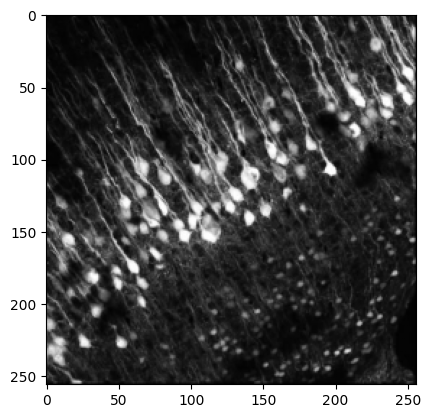

In [166]:
cell_img = plt.imread('data/cells.png')
cell_img = resize(cell_img, (256, 256))
plt.imshow(cell_img, cmap='gray')

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [167]:
cell_ft = np.fft.fft2(cell_img)
print(cell_ft.dtype)

complex64


**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [168]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

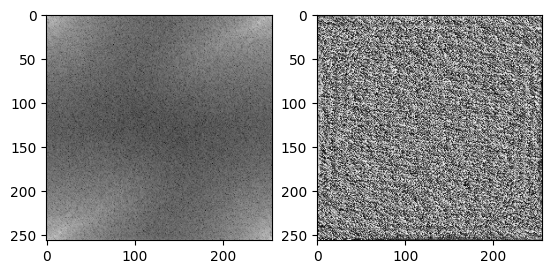

In [169]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


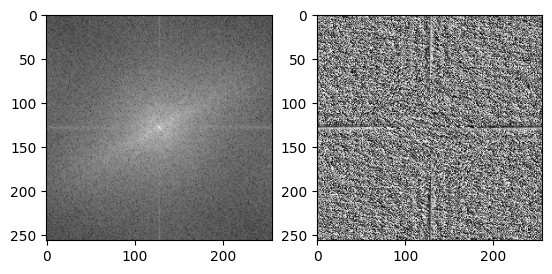

In [170]:
cell_centered = np.fft.fftshift(cell_ft) 

cell_amplitudeCntrd = np.abs(cell_centered)
cell_phaseCntrd = np.angle(cell_centered)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(cell_amplitudeCntrd), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(cell_phaseCntrd, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


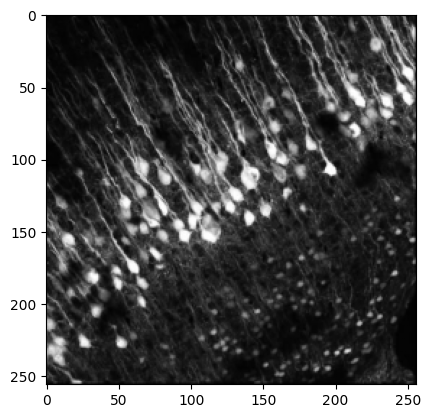

In [171]:
cell_restored = np.fft.ifft2(np.fft.ifftshift(cell_centered)) # shift back before restoring the image
plt.figure()
plt.imshow(np.abs(cell_restored), cmap='gray')

---


**[Task 2 (a).]()** Load the brain MR image.


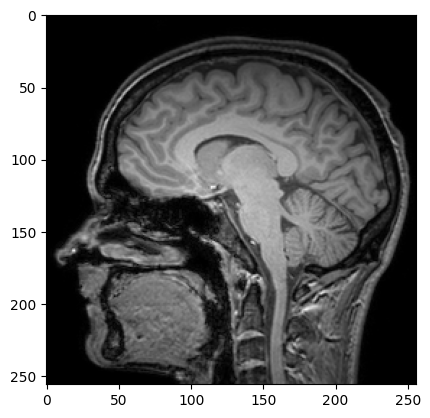

In [172]:
brain_img = plt.imread('data/brain_mri.png')
brain_img = resize(brain_img, (256, 256))
plt.imshow(brain_img, cmap='gray')

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


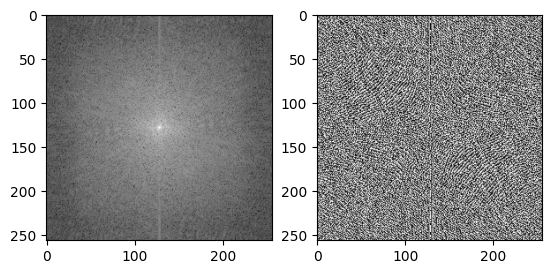

In [173]:
brain_ft = np.fft.fft2(brain_img) # apply Fourier transform
brain_centered = np.fft.fftshift(brain_ft) # center so that zero is displayed at the center

brain_amplitudeCntrd = np.abs(brain_centered)
brain_phaseCntrd = np.angle(brain_centered)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(brain_amplitudeCntrd), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(brain_phaseCntrd, 'gray')

In [174]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain MR image and the phase of cell image. Do the IFFT and display the resulting image.


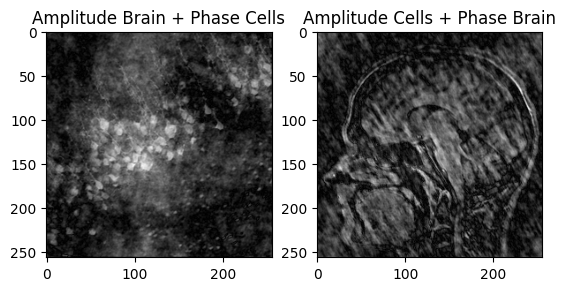

In [175]:
aBrain_pCell = to_complex_array(brain_amplitudeCntrd, cell_phaseCntrd)
pBrain_aCell = to_complex_array(cell_amplitudeCntrd, brain_phaseCntrd)

aBrain_pCell_restored = np.fft.ifft2(np.fft.ifftshift(aBrain_pCell))
pBrain_aCell_restored = np.fft.ifft2(np.fft.ifftshift(pBrain_aCell))

plt.figure()
plt.subplot(1, 2, 1)   
plt.imshow(np.abs(aBrain_pCell_restored), cmap='gray')
plt.title('Amplitude Brain + Phase Cells')
plt.subplot(1, 2, 2)   
plt.imshow(np.abs(pBrain_aCell_restored), cmap='gray')
plt.title('Amplitude Cells + Phase Brain')
plt.show()


--> The Phase Carries more information 

**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


In [176]:
# already done

---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [177]:
filter_window_size = 25
low_pass_mask = np.zeros(brain_img.shape)
# Insert a rectangle of filter window size with the value one to the mask at the center of the image
center_x, center_y = low_pass_mask.shape[0] // 2, low_pass_mask.shape[1] // 2
half_size = filter_window_size // 2 # half size of the filter window because we need to go half size in each direction from the center

# Slice-Spezifikation ist [row_start:row_stop, col_start:col_stop]
low_pass_mask[center_x - half_size:center_x + half_size, center_y - half_size:center_y + half_size] = 1

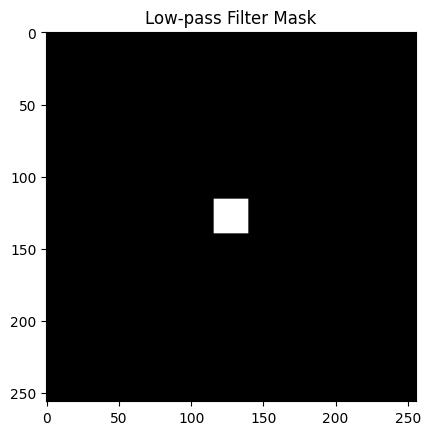

In [178]:
# Display your mask to check if only the center contains ones
plt.imshow(low_pass_mask, cmap='gray')
plt.title('Low-pass Filter Mask')
plt.show()

**[Task 3 (b).]()** Create a highpass filter maks.


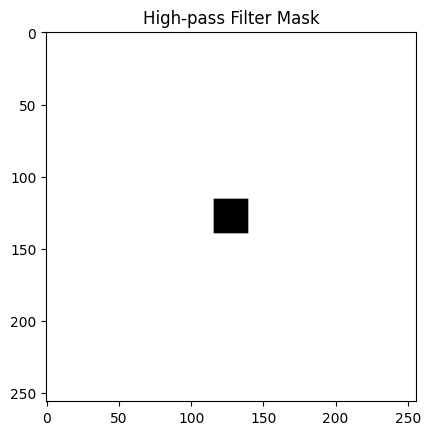

In [179]:
#(b) Also create a high-pass filter mask – Hint: You can use “one minus the low-pass mask” to achieve this
ones = np.ones(brain_img.shape)
high_pass_mask = ones - low_pass_mask
# Display your high-pass filter mask
plt.imshow(high_pass_mask, cmap='gray')
plt.title('High-pass Filter Mask')
plt.show()

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


C:\Users\Jonny\AppData\Local\Temp\ipykernel_35984\562776834.py:15: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(brain_low_pass_filtered_amplitude), cmap='gray') # scale the amplitudes logarithmically
C:\Users\Jonny\AppData\Local\Temp\ipykernel_35984\562776834.py:18: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(brain_high_pass_filtered_amplitude), cmap='gray') # scale the amplitudes logarithmically


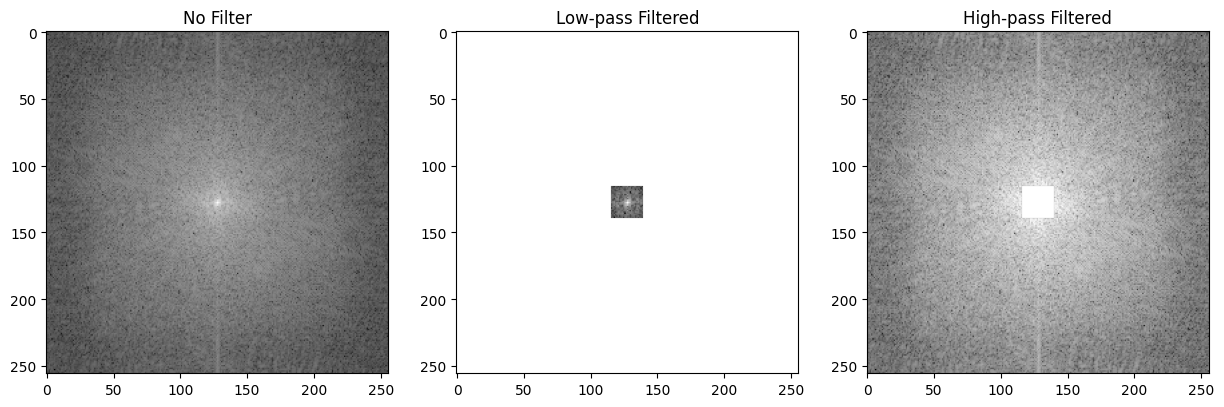

In [180]:
# Now apply your masks by multiplying them with the shifted amplitude
# of the brain image. Display the shifted amplitude without any filter, the
# low pass-filtered, and the high pass-filtered image side by side. Scale the
# amplitudes logarithmically

brain_no_filter_amplitude = brain_amplitudeCntrd
brain_low_pass_filtered_amplitude = brain_amplitudeCntrd * low_pass_mask
brain_high_pass_filtered_amplitude = brain_amplitudeCntrd * high_pass_mask

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(np.log(brain_no_filter_amplitude), cmap='gray') # scale the amplitudes logarithmically
plt.title('No Filter')
plt.subplot(1, 3, 2)
plt.imshow(np.log(brain_low_pass_filtered_amplitude), cmap='gray') # scale the amplitudes logarithmically
plt.title('Low-pass Filtered')
plt.subplot(1, 3, 3)
plt.imshow(np.log(brain_high_pass_filtered_amplitude), cmap='gray') # scale the amplitudes logarithmically
plt.title('High-pass Filtered')
plt.show()


**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


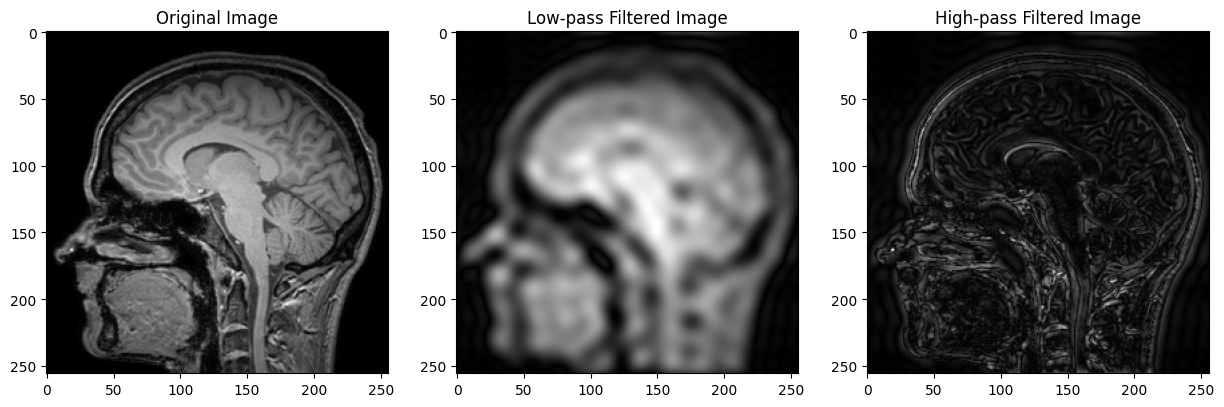

In [181]:
#Merge the filtered amplitudes with the phase of the brain image to a complex
#array. Reverse the shift and apply the IFFT. Show the original image, the low
#pass-filtered, and the high pass-filtered merged images side by side.

low_pass_complex = to_complex_array(brain_low_pass_filtered_amplitude, brain_phaseCntrd)
high_pass_complex = to_complex_array(brain_high_pass_filtered_amplitude, brain_phaseCntrd)

#restore images
low_pass_restored = np.fft.ifft2(np.fft.ifftshift(low_pass_complex))
high_pass_restored = np.fft.ifft2(np.fft.ifftshift(high_pass_complex))

#show images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(brain_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(np.abs(low_pass_restored), cmap='gray')
plt.title('Low-pass Filtered Image')
plt.subplot(1, 3, 3)
plt.imshow(np.abs(high_pass_restored), cmap='gray')
plt.title('High-pass Filtered Image')
plt.show()


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [182]:
#Implement your own DFT function and compare the result as well as the run time
#to the implementation from numpy
def my_dft2(image):
    M, N = image.shape
    dft = np.zeros((M, N), dtype=complex)
    for u in range(M):
        for v in range(N):
            sum_val = 0
            for x in range(M):
                for y in range(N):
                    exponent = -2j * np.pi * ((u * x) / M + (v * y) / N)
                    sum_val += image[x, y] * np.exp(exponent)
            dft[u, v] = sum_val
    return dft

**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [183]:
#Implement a re-usable function that computes the IDFT
def my_idft2(dft):
    M, N = dft.shape
    idft = np.zeros((M, N), dtype=complex)
    for x in range(M):
        for y in range(N):
            sum_val = 0
            for u in range(M):
                for v in range(N):
                    exponent = 2j * np.pi * ((u * x) / M + (v * y) / N)
                    sum_val += dft[u, v] * np.exp(exponent)
            idft[x, y] = sum_val / (M * N)
    return idft

Due to high computational costs, we need to resize the image.


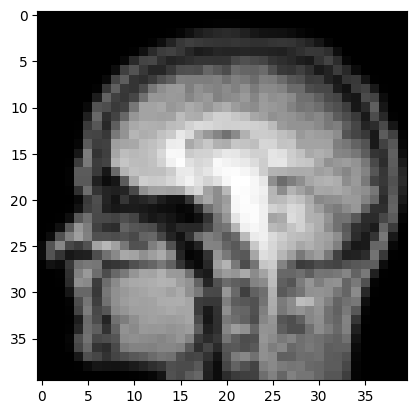

In [184]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


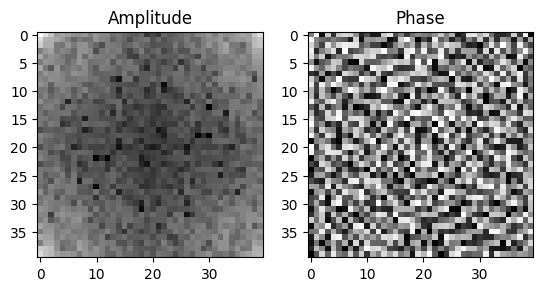

In [188]:
# Try your implementation using the brain image and display amplitude and phase
# Use the amplitude and phase directly from the DFT result (they are real), do not FFT them again.

test_img_dft = my_dft2(test_img)
test_img_amplitude = np.abs(test_img_dft)
test_img_phase = np.angle(test_img_dft)

plt.figure()
plt.subplot(1, 2, 1)

# avoid log(0) and ensure a real array is passed to imshow
plt.imshow(np.log(test_img_amplitude + 1e-9), cmap='gray')
plt.title('Amplitude')
plt.subplot(1, 2, 2)
plt.imshow(test_img_phase, cmap='gray')
plt.title('Phase')
plt.show()

**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
